In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd

import librosa
import librosa.display

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
MARKER = '.'
MARKERSIZE = 4
LINESTYLE ='-'
FONTSIZE = 12
FIGSIZE = (12, 8 )

kwargs = {'marker': MARKER, 'linestyle': 'solid', 'linewidth': 1, 'markersize': MARKERSIZE}

In [3]:
# FILE PARAMS
path = 'data/T0000637.WAV'

# type 2 ultrasonic
#t0 = 148.8496 #- 0.1
#t1 = 148.8732 #+ 0.1
#_type = "USV"

# type 1 audible
t0 = 218.8369
t1 = 218.8574
_type = "audible"

# AUDIO PARAMS
SR = int(250e3)
FMIN = 0
FMAX = 0.5 * SR


AUDIOPARAMS = {
    'path': path,
    'sr': SR,
    'mono': True,
    'offset': t0,
    'duration': t1-t0
}

# STFT PARAMS
NFFT = 2048*4
HOPLENGTH = int(NFFT/16)
WINLENGTH = NFFT

STFTPARAMS = {
    'n_fft': NFFT,
    'hop_length': HOPLENGTH,
    'win_length': WINLENGTH
}

STFTPLOTPARAMS = {
    # for x axis settings
    'sr': SR,
    'hop_length': int(NFFT/16),
    'x_axis': 'time',
    # for y axis settings
    'fmax': FMAX,
    'y_axis': 'linear',
    # color
    # cmap= 'PuBu_r', #'gray', 'PuBu_r', 'RdBu',
}


# MFCC PARAMS
HTK = True


MFCCPAMARS = {
    'sr': SR,
    'S': None,
    'n_mfcc': 13,
    'dct_type': 2,
    'norm': 'ortho',
    'htk': HTK
}

MFCCPLOTPARAMS = {
    # for x axis settings
    'sr': SR,
    'hop_length': HOPLENGTH,
    'x_axis': 'time',
    # for y axis settings
    'y_axis': 'nose',
    'y_coords': np.linspace(1, 38, 38)
}

# MEL FILTERBANK PARAMS
NMELS = 128
POWER = 2

MELPARAMS1 = {
    'sr': 22050, 'n_fft': NFFT, 'n_mels': NMELS, 'fmin': FMIN, 'fmax': 8000, 'htk': HTK,
    
}


MELPARAMS2 = {
    'sr': SR, 'n_fft': NFFT, 'n_mels': NMELS, 'fmin': FMIN, 'fmax': FMAX, 'htk': HTK, 
}


MELPLOTPARAMS = {
    # for x axis settings
    'sr': SR,
    'hop_length': int(NFFT/2),
    'x_axis': 'time',
    # for y axis settings
    'fmax': FMAX,
    'y_axis': 'mel',
    # color
    # cmap= 'gray', #'PuBu_r', 'RdBu',
}



melfb1 =  librosa.filters.mel(**MELPARAMS1)
print(f"mel fiterbank 1 shape = {melfb1.shape}")
print(f"mel fiterbank 1 time resolution = {1000 * MELPARAMS1['n_fft']/AUDIOPARAMS['sr']} s")
print(f"mel fiterbank 1 frequency resolution = {MELPARAMS1['fmax']/MELPARAMS1['n_fft']} Hz\n")
       
       
melfb2 =  librosa.filters.mel(**MELPARAMS2)
print(f"mel fiterbank 2shape = {melfb2.shape}")
print(f"mel fiterbank 2 time resolution = {1000 * MELPARAMS2['n_fft']/AUDIOPARAMS['sr']} ms")
print(f"mel fiterbank 2 frequency resolution = {MELPARAMS2['fmax']/MELPARAMS2['n_fft']} Hz")

mel fiterbank 1 shape = (128, 4097)
mel fiterbank 1 time resolution = 32.768 s
mel fiterbank 1 frequency resolution = 0.9765625 Hz

mel fiterbank 2shape = (128, 4097)
mel fiterbank 2 time resolution = 32.768 ms
mel fiterbank 2 frequency resolution = 15.2587890625 Hz


**Show librosa mel filter bank**

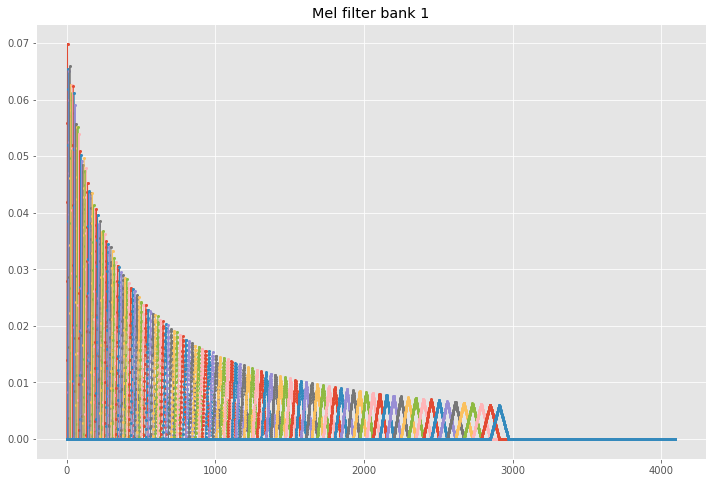

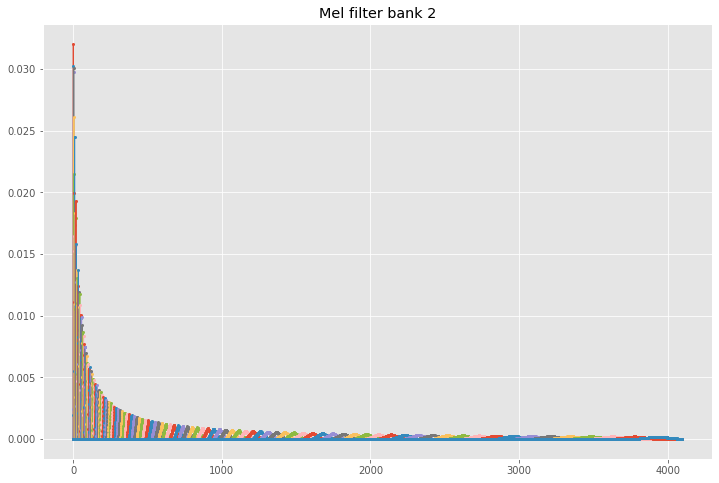

In [4]:
data = pd.DataFrame(data=melfb1.T)
fig, ax = plt.subplots(figsize=FIGSIZE)
data.plot(ax=ax, **kwargs)
ax.get_legend().remove()
plt.title("Mel filter bank 1")
plt.show()


data = pd.DataFrame(data=melfb2.T)
fig, ax = plt.subplots(figsize=FIGSIZE)
data.plot(ax=ax, **kwargs)
ax.get_legend().remove()
plt.title("Mel filter bank 2")
plt.show()

**Load audio**

sample duration = 0.0205 seconds.
audio shape = (5125,)


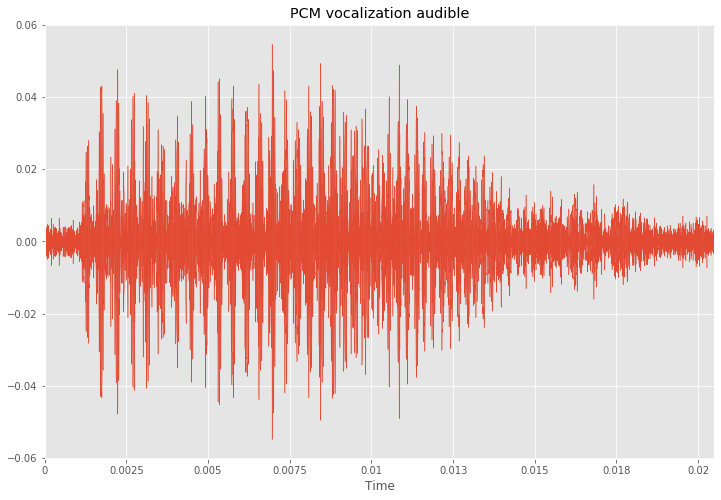

In [5]:
y, sr = librosa.load(**AUDIOPARAMS)

plt.figure(figsize=FIGSIZE)
librosa.display.waveplot(y, sr=sr)
plt.title(f'PCM vocalization {_type}')

print(f"sample duration = {y.shape[0]/sr} seconds.")
print(f'audio shape = {y.shape}')


import IPython.display as ipd
export_filename = '/tmp/to_erase_audio.wav'
librosa.output.write_wav(export_filename, y, sr)
ipd.Audio(export_filename)

**Compute spectrogram**

Spectrogram shape = (4097, 11)


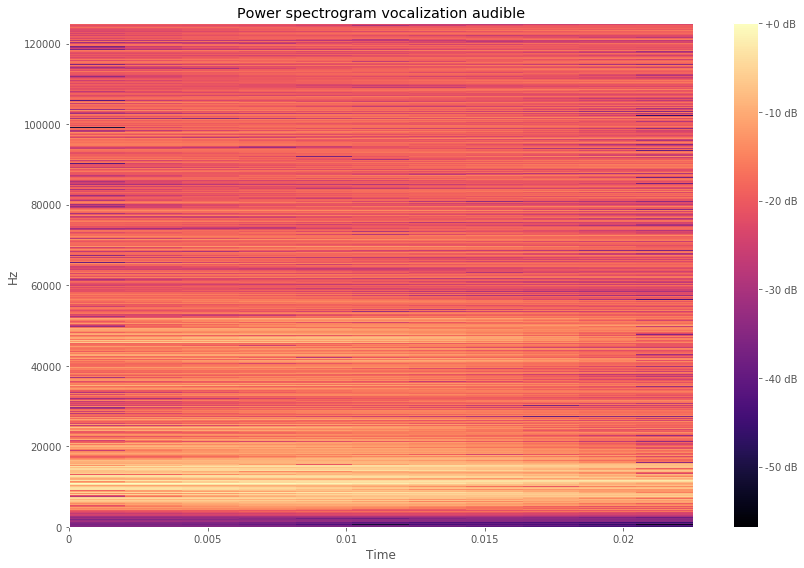

In [6]:
D = np.abs(librosa.stft(y, **STFTPARAMS))
print(f'Spectrogram shape = {D.shape}')


plt.figure(figsize=FIGSIZE)                         
librosa.display.specshow(
    librosa.power_to_db(D, ref=np.max),
    **STFTPLOTPARAMS
)
plt.colorbar(format='%+2.0f dB')
plt.title(f'Power spectrogram vocalization {_type}')
plt.tight_layout()

plt.show()

**Compute melspectrogram**

Melspectrogram shape = (128, 11)


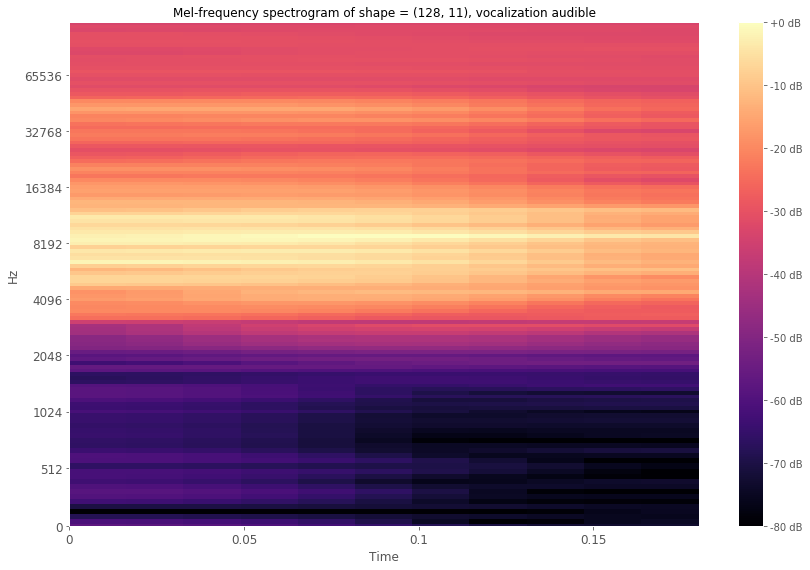

In [7]:
M = librosa.feature.melspectrogram(y=y, **MELPARAMS2)
print(f'Melspectrogram shape = {M.shape}')

plt.figure(figsize=FIGSIZE)
ax = librosa.display.specshow(
    librosa.power_to_db(M, ref=np.max),
    **MELPLOTPARAMS
)
plt.colorbar(format='%+2.0f dB')
plt.title(f'Mel-frequency spectrogram of shape = {M.shape}, vocalization {_type}')
plt.tight_layout()

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(FONTSIZE)

plt.show()

**Compute MFFC**

/home/utilisateur/anaconda3/envs/palomars/lib/python3.6/site-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


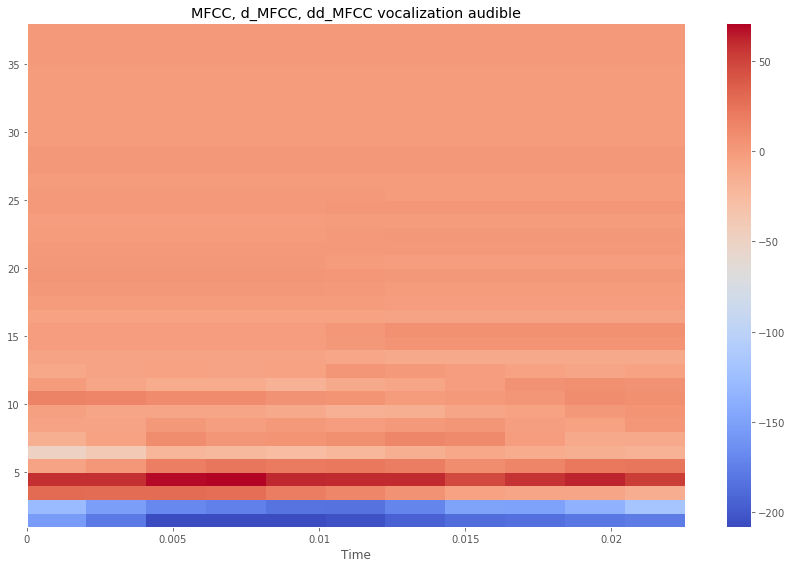

In [8]:
tmp = librosa.feature.mfcc(y=y, **MFCCPAMARS)
MFCC = tmp[1:, :]
d_MFCC = librosa.feature.delta(tmp)
dd_MFCC = librosa.feature.delta(d_MFCC)

MFCC = np.vstack([MFCC, d_MFCC, dd_MFCC])

nono =  plt.figure(figsize=FIGSIZE)
librosa.display.specshow(
    MFCC,
    **MFCCPLOTPARAMS
)
plt.colorbar()
plt.title(f'MFCC, d_MFCC, dd_MFCC vocalization {_type}')
plt.tight_layout()